## EDA (Explorary Data Analysis)
### Kaggle: Students Performance in Exams
#### To understand the influence of the parents background, test preparation etc on students performance

#### Example Research Questions
> How effective is the test preparation course?  
> Which major factors contribute to test outcomes?  
> What would be the best way to improve student scores on each test?  
> What patterns and interactions in the data can you find? Let me know in the comments section below.

In [103]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#### Load dataset (*.csv file)

In [104]:
df = pd.read_csv('StudentsPerformance.csv')

#### Check dataset size

In [105]:
df.shape

(1000, 8)

In [106]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [107]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [108]:
print(f'gender: {np.unique(df["gender"])}')
print(f'race/ethnicity: {np.unique(df["race/ethnicity"])}')
print(f'parental level of education: {np.unique(df["parental level of education"])}')
print(f'lunch: {np.unique(df["lunch"])}')
print(f'test preparation course: {np.unique(df["test preparation course"])}')

gender: ['female' 'male']
race/ethnicity: ['group A' 'group B' 'group C' 'group D' 'group E']
parental level of education: ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
lunch: ['free/reduced' 'standard']
test preparation course: ['completed' 'none']


In [109]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [110]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


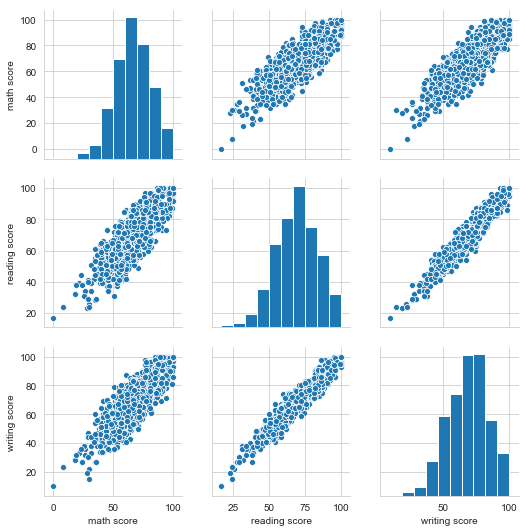

In [111]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
# plt.savefig('student_pairplot.png')

In [164]:
counts = pd.crosstab(df['parental level of education'], df['lunch'])
counts = counts.reindex(['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"])
counts

lunch,free/reduced,standard
parental level of education,,
some high school,61,118
high school,70,126
some college,79,147
associate's degree,77,145
bachelor's degree,44,74
master's degree,24,35


In [165]:
grouped1 = df.groupby(by='gender')
grouped1.size()

gender
female    518
male      482
dtype: int64

In [166]:
grouped1.mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [167]:
grouped1.describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...                writing score             \
               count       mean  ...     75%    max         count       mean   
gender                           ...                                           
female         518.0  72.608108  ...    83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...    75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

In [168]:
grouped1.agg(['min', 'median', 'max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

In [169]:
grouped2 = df.groupby(['race/ethnicity'])
grouped2.size()

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
dtype: int64

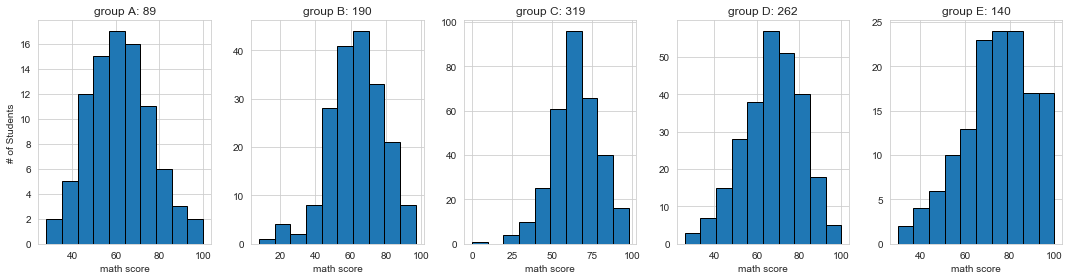

In [170]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
groups = ['group A', 'group B', 'group C', 'group D', 'group E']
for i, (ax, group) in enumerate(zip(axes, groups)):
    ax.hist(df[df['race/ethnicity'] == group]['math score'], bins=10, edgecolor='k')
    ax.set_title(f'{group}: {(df["race/ethnicity"] == group).astype(int).sum()}')
    ax.set_xlabel('math score')
axes[0].set_ylabel('# of Students')
plt.tight_layout()

In [171]:
df2 = grouped2['math score', 'reading score', 'writing score'].agg(['min', 'median', 'max'])
df2

math score             reading score             writing score  \
                      min median  max           min median  max           min   
race/ethnicity                                                                  
group A                28   61.0  100            23     64  100            19   
group B                 8   63.0   97            24     67   97            15   
group C                 0   65.0   98            17     71  100            10   
group D                26   69.0  100            31     71  100            32   
group E                30   74.5  100            26     74  100            22   

                            
               median  max  
race/ethnicity              
group A            62   97  
group B            67   96  
group C            68  100  
group D            72  100  
group E            72  100

In [172]:
grouped3 = df.groupby('parental level of education')
df3 = grouped3['math score', 'reading score', 'writing score'].agg(['min', 'median', 'max'])
df3 = df3.reindex(['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"])
df3

math score             reading score              \
                                   min median  max           min median  max   
parental level of education                                                    
some high school                     0   65.0   97            17   67.0  100   
high school                          8   63.0   99            24   66.0   99   
some college                        19   67.5  100            23   70.5  100   
associate's degree                  26   67.0  100            31   72.5  100   
bachelor's degree                   29   68.0  100            41   73.0  100   
master's degree                     40   73.0   95            42   76.0  100   

                            writing score              
                                      min median  max  
parental level of education                            
some high school                       10   66.0  100  
high school                            15   64.0  100  
some college                           19   70.0   99  
associate's degree                     35   70.5  100  
bachelor's degree                      38   74.0  100  
master's degree                        46   75.0  100

Text(0.5, 1.0, 'math score')

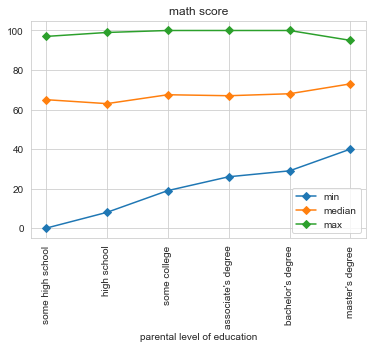

In [173]:
df3['math score'].plot.line(marker='D')
plt.xticks(np.arange(len(df3.index)), df3.index, rotation=90)
plt.title('math score')

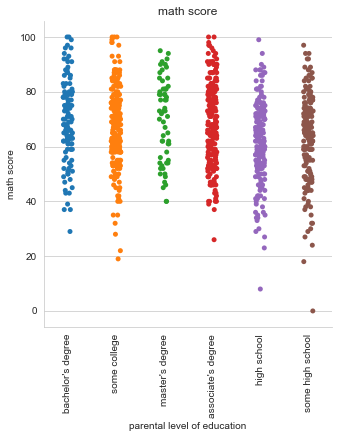

In [174]:
g = sns.catplot(x='parental level of education', y='math score', data=df)
g.set_xticklabels(rotation=90)
plt.title('math score')
g.savefig('strip plot.png')

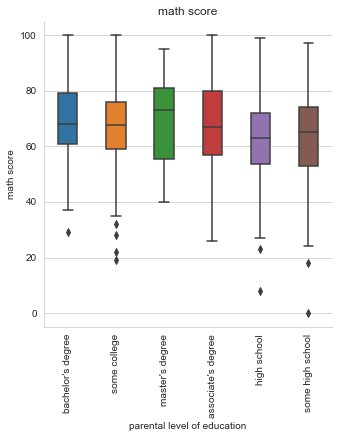

In [175]:
g = sns.catplot(x='parental level of education', y='math score', data=df, kind='box', width=0.4)
g.set_xticklabels(rotation=90)
plt.title('math score')
g.savefig('box plot.png')

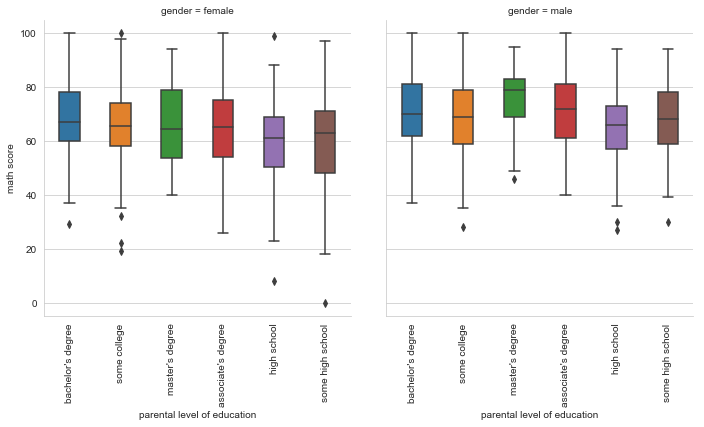

In [176]:
g = sns.catplot(x='parental level of education', y='math score', col='gender', data=df, kind='box', width=0.4)
g.set_xticklabels(rotation=90)

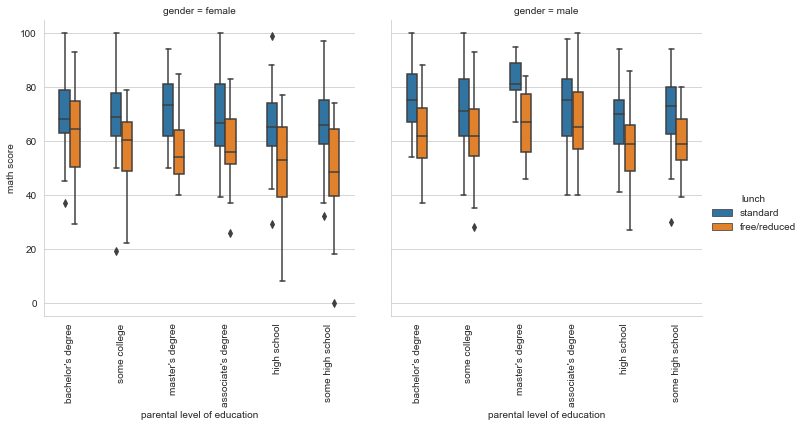

In [177]:
g = sns.catplot(x='parental level of education', y='math score',
                col='gender', hue='lunch',
                data=df, kind='box', width=0.4)
g.set_xticklabels(rotation=90)

In [178]:
grouped4 = df.groupby('lunch')
df4 = grouped4['math score', 'reading score', 'writing score'].agg(['min', 'median', 'max'])
df4

math score             reading score             writing score  \
                    min median  max           min median  max           min   
lunch                                                                         
free/reduced          0     60  100            17     65  100            10   
standard             19     69  100            26     72  100            22   

                          
             median  max  
lunch                     
free/reduced     64  100  
standard         72  100

Text(0, 0.5, 'Median Score')

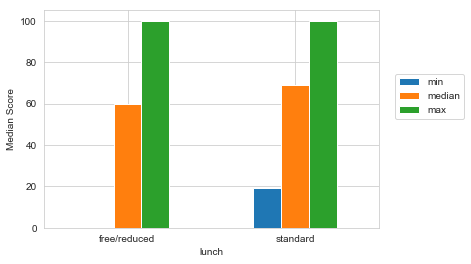

In [179]:
df4['math score'].plot.bar()
plt.xticks(rotation=0)
plt.legend(loc=[1.05, 0.5])
plt.ylabel('Median Score')

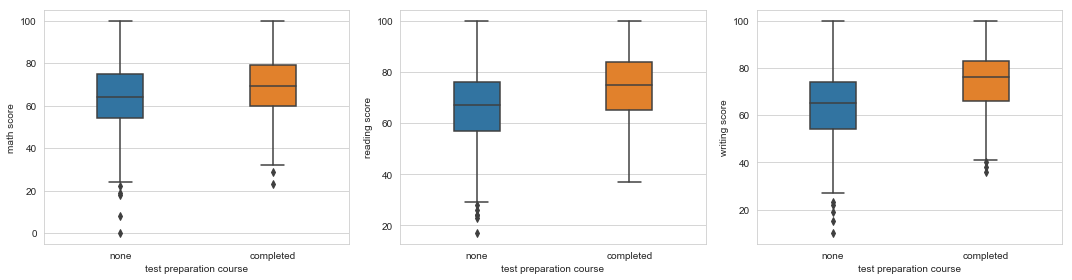

In [180]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
courses = ['math score', 'reading score', 'writing score']
for (course, ax) in zip(courses, axes):
    g = sns.catplot(x='test preparation course', y=course, ax=ax, data=df, kind='box', width=0.3)
    plt.close(g.fig)
plt.tight_layout()

In [181]:
grouped5 = df.groupby('test preparation course')
df5 = grouped5['math score', 'reading score', 'writing score'].agg(['min', 'median', 'max'])
df5

math score             reading score              \
                               min median  max           min median  max   
test preparation course                                                    
completed                       23     69  100            37     75  100   
none                             0     64  100            17     67  100   

                        writing score              
                                  min median  max  
test preparation course                            
completed                          36     76  100  
none                               10     65  100

In [182]:
df.pivot_table(index=['test preparation course', 'gender'])

math score  reading score  writing score
test preparation course gender                                          
completed               female   67.195652      77.375000      78.793478
                        male     72.339080      70.212644      69.793103
none                    female   61.670659      69.982036      68.982036
                        male     66.688312      62.795455      59.649351

In [183]:
pd.crosstab(df['race/ethnicity'], df['gender'])

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


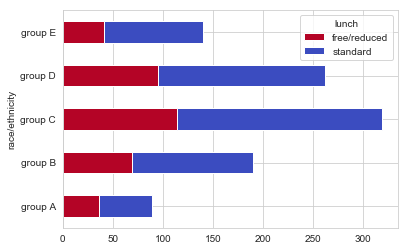

In [184]:
df6.plot(kind='barh', stacked=True, colormap='coolwarm_r')

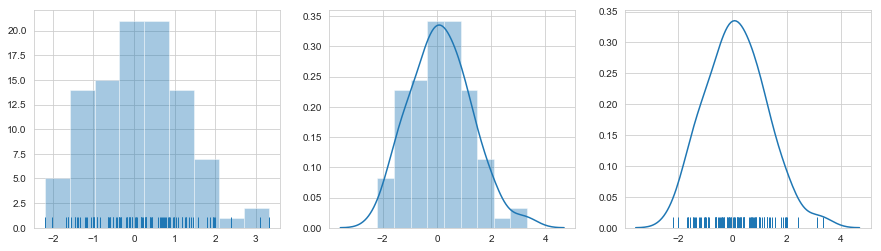

In [185]:
x = np.random.normal(size=100)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.distplot(x, hist=True, kde=False, rug=True, ax=axes[0])
sns.distplot(x, hist=True, kde=True, rug=False, ax=axes[1])
sns.distplot(x, hist=False, kde=True, rug=True, ax=axes[2])
plt.savefig('distplot.png')